In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from IPython.display import display

In [2]:
def process_df(df, dataset):
    """
    Removes loss and fixes csv by doing transpose.
    """
    if dataset == 'cifar10':
        split_point = 4
        df.drop(columns=df.columns[[3, 5, 7, 9]], inplace=True)
    else:
        split_point = 3
        df.drop(columns=df.columns[[3, 5, 7]], inplace=True)
    df.columns = ['L1', 'L2', 'L_inf'] + [name + '_Acc' for name in df.index.tolist()]
    
    # This exists because I made a mistake on my csv script
    tmp = df.iloc[:, -split_point:]
    tmp = pd.DataFrame(tmp.values.T, index=tmp.index, columns=tmp.columns)
    df = pd.concat([df.iloc[:, :split_point], tmp], axis=1)
    
    return df

In [3]:
cifar10_fgsm_list = sorted(glob('csvs/cifar10_fgsm*'))
dfs = [process_df(pd.read_csv(file, index_col=0), 'cifar10') for file in cifar10_fgsm_list]
for df in dfs:
    display(df)

,L1,L2,L_inf,Deep_CNN_Acc,Deep_CNN_Acc,ResNet20_Acc,ResNet56_Acc,Densenet121_Acc
Deep_CNN,11.973993,0.216678,0.003922,0.5429,0.5429,0.8571,0.8766,0.8719
ResNet20,11.974048,0.216679,0.003922,0.8571,0.8561,0.4226,0.8782,0.8751
ResNet56,11.974034,0.216679,0.003922,0.8766,0.8577,0.8508,0.4466,0.8756
Densenet121,11.974432,0.216682,0.003922,0.8719,0.8730,0.8940,0.9130,0.7188


,L1,L2,L_inf,Deep_CNN_Acc,Deep_CNN_Acc,ResNet20_Acc,ResNet56_Acc,Densenet121_Acc
Deep_CNN,35.809391,0.648529,0.011765,0.1986,0.1986,0.6487,0.7079,0.8466
ResNet20,35.809177,0.648526,0.011765,0.6487,0.7169,0.1875,0.7224,0.8561
ResNet56,35.809051,0.648524,0.011765,0.7079,0.7291,0.6573,0.2258,0.8620
Densenet121,35.811723,0.648554,0.011765,0.8466,0.7961,0.8184,0.8612,0.3806


,L1,L2,L_inf,Deep_CNN_Acc,Deep_CNN_Acc,ResNet20_Acc,ResNet56_Acc,Densenet121_Acc
Deep_CNN,94.980716,1.723366,0.031373,0.0963,0.0963,0.2882,0.3570,0.7394
ResNet20,94.975535,1.723297,0.031373,0.2882,0.3579,0.1296,0.4097,0.7806
ResNet56,94.976243,1.723308,0.031373,0.3570,0.3560,0.3163,0.1521,0.7985
Densenet121,94.989656,1.723459,0.031373,0.7394,0.4817,0.4931,0.5799,0.1476


,L1,L2,L_inf,Deep_CNN_Acc,Deep_CNN_Acc,ResNet20_Acc,ResNet56_Acc,Densenet121_Acc
Deep_CNN,153.598156,2.791415,0.05098,0.0782,0.0782,0.1501,0.2112,0.6091
ResNet20,153.586915,2.791279,0.05098,0.1501,0.1904,0.1084,0.2680,0.6762
ResNet56,153.587792,2.791289,0.05098,0.2112,0.1881,0.1834,0.1279,0.7141
Densenet121,153.616130,2.791606,0.05098,0.6091,0.2693,0.2590,0.3431,0.1091


Text(0.53, 1.05, 'CIFAR10 Fast Gradient Sign Method')

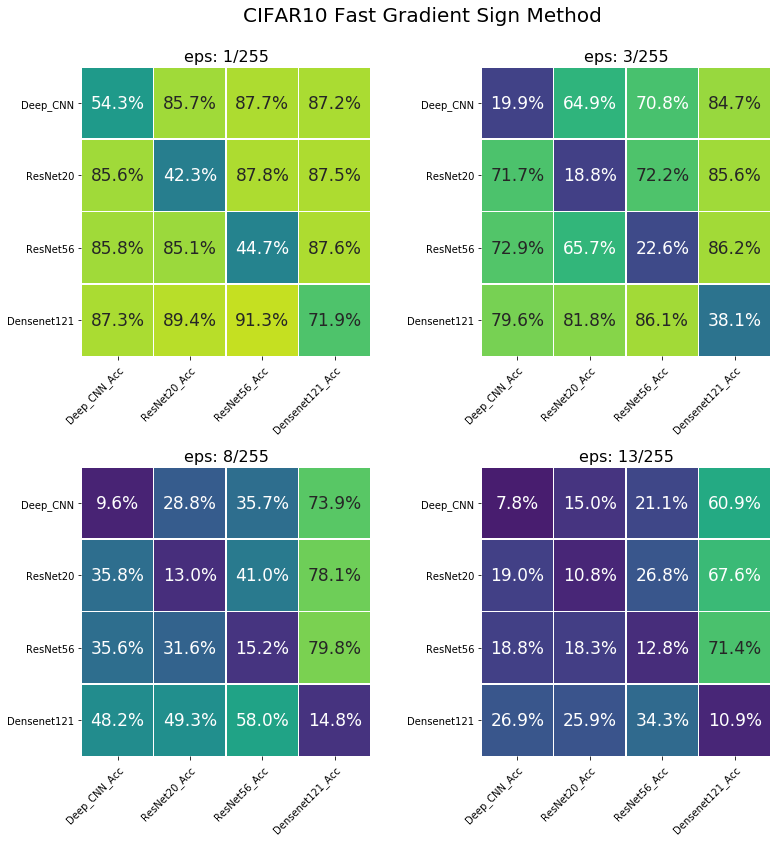

In [4]:
titlenames = ['eps: 1/255', 'eps: 3/255', 'eps: 8/255', 'eps: 13/255']
heatmap_args = dict(annot=True, square=True, cbar=False, cmap='viridis', vmin=0,
                    vmax=1, fmt='.1%', annot_kws={"size": 17}, linewidths=0.5)

fig, axs = plt.subplots(2, 2, figsize=(11, 11), constrained_layout=True)
for i in range(len(dfs)):
    loc = divmod(i, 2)
    sns.heatmap(dfs[i].iloc[:, -4:], ax=axs[loc], **heatmap_args)
    axs[loc].set_title(titlenames[i], fontsize=16)
    plt.setp(axs[loc].get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
    plt.setp(axs[loc].get_yticklabels(), rotation=0)
fig.suptitle("CIFAR10 Fast Gradient Sign Method", fontsize=20, x=0.53, y=1.05)

In [5]:
cifar10_deepfool_df = process_df(pd.read_csv('csvs/cifar10_deepfool.csv', index_col=0), 'cifar10')
cifar10_deepfool_df

,L1,L2,L_inf,Deep_CNN_Acc,Deep_CNN_Acc,ResNet20_Acc,ResNet56_Acc,Densenet121_Acc
Deep_CNN,5.400828,0.143732,0.017553,0.0680,0.0680,0.8901,0.9050,0.8768
ResNet20,3.520491,0.092986,0.011293,0.8901,0.8825,0.0594,0.9143,0.8786
ResNet56,3.219813,0.086521,0.011044,0.9050,0.8830,0.8972,0.0517,0.8789
Densenet121,11.502095,0.290129,0.030388,0.8768,0.8676,0.8915,0.9120,0.0738


[None, None, None, None, None, None, None, None]

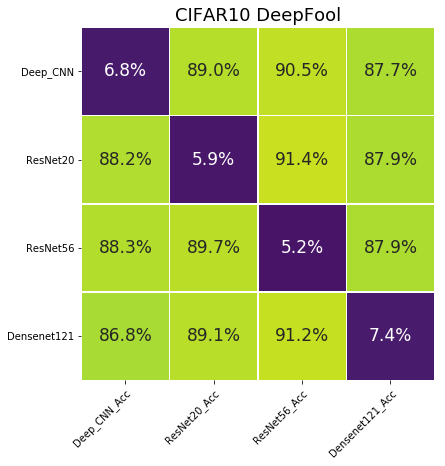

In [6]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.heatmap(cifar10_deepfool_df.iloc[:, -4:], ax=ax, **heatmap_args)
ax.set_title("CIFAR10 DeepFool", fontsize=18)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
plt.setp(ax.get_yticklabels(), rotation=0)

In [7]:
cifar10_madry_df = process_df(pd.read_csv('csvs/cifar10_madry_0.00392156862745098.csv', index_col=0), 'cifar10')
display(cifar10_madry_df)

,L1,L2,L_inf,Deep_CNN_Acc,Deep_CNN_Acc,ResNet20_Acc,ResNet56_Acc,Densenet121_Acc
Deep_CNN,11.973191,0.216671,0.003922,0.5164,0.5164,0.8651,0.8845,0.8735
ResNet20,11.973720,0.216676,0.003922,0.8651,0.8601,0.3922,0.8809,0.8766
ResNet56,11.974106,0.216679,0.003922,0.8845,0.8639,0.8606,0.4613,0.8765
Densenet121,11.974389,0.216682,0.003922,0.8735,0.8739,0.8954,0.9149,0.7111


[None, None, None, None, None, None, None, None]

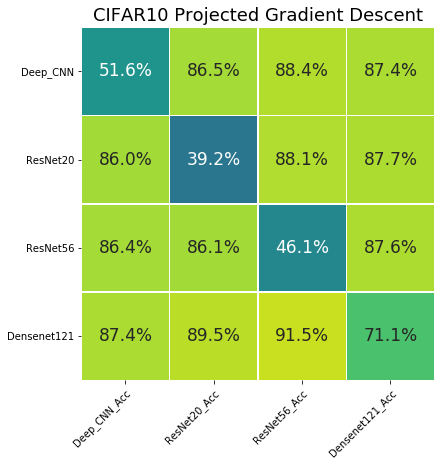

In [8]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.heatmap(cifar10_madry_df.iloc[:, -4:], ax=ax, **heatmap_args)
ax.set_title("CIFAR10 Projected Gradient Descent", fontsize=18)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
plt.setp(ax.get_yticklabels(), rotation=0)

In [9]:
oid_fgsm_list = sorted(glob('csvs/oid3class_fgsm*'))
dfs = [process_df(pd.read_csv(file, index_col=0), 'oid3class') for file in oid_fgsm_list]
for df in dfs:
    display(df)

,L1,L2,L_inf,Xception_Acc,InceptionV3_Acc,InceptionResnetV2_Acc
Xception,1043.662354,2.022887,0.003922,0.296000,0.862667,0.990667
InceptionV3,1043.679199,2.022909,0.003922,0.880000,0.398667,0.990667
InceptionResnetV2,1043.536865,2.022762,0.003922,0.882667,0.872000,0.918667


,L1,L2,L_inf,Xception_Acc,InceptionV3_Acc,InceptionResnetV2_Acc
Xception,3116.882080,6.048886,0.011765,0.262667,0.842667,0.992000
InceptionV3,3116.756592,6.048693,0.011765,0.869333,0.233333,0.992000
InceptionResnetV2,3116.293701,6.048203,0.011765,0.885333,0.869333,0.882667


,L1,L2,L_inf,Xception_Acc,InceptionV3_Acc,InceptionResnetV2_Acc
Xception,8252.223633,16.056183,0.031373,0.302667,0.658667,0.992000
InceptionV3,8251.291016,16.054903,0.031373,0.632000,0.217333,0.990667
InceptionResnetV2,8250.080078,16.053669,0.031373,0.802667,0.770667,0.890667


,L1,L2,L_inf,Xception_Acc,InceptionV3_Acc,InceptionResnetV2_Acc
Xception,13321.861328,25.976959,0.05098,0.328000,0.477333,0.990667
InceptionV3,13319.652344,25.973989,0.05098,0.460000,0.244000,0.990667
InceptionResnetV2,13317.497070,25.971670,0.05098,0.630667,0.657333,0.906667


Text(0.53, 1.05, 'OIDv4 3 Class Fast Gradient Sign')

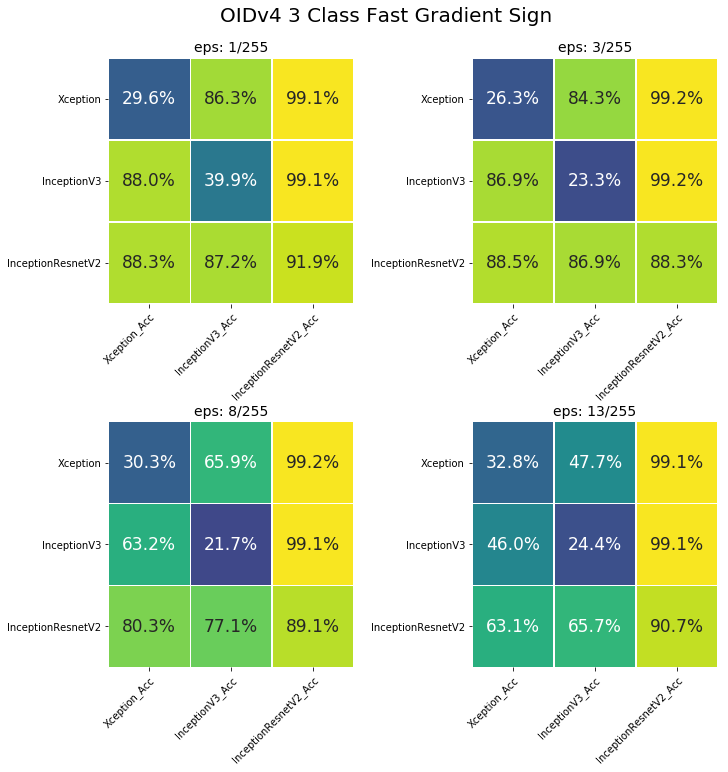

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
for i in range(len(dfs)):
    loc = divmod(i, 2)
    sns.heatmap(dfs[i].iloc[:, -3:], ax=axs[loc], **heatmap_args)
    axs[loc].set_title(titlenames[i], fontsize=14)
    plt.setp(axs[loc].get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
    plt.setp(axs[loc].get_yticklabels(), rotation=0)
fig.suptitle("OIDv4 3 Class Fast Gradient Sign", fontsize=20, x=0.53, y=1.05)

In [11]:
oid3class_deepfool_df = process_df(pd.read_csv('csvs/oid3class_deepfool.csv', index_col=0), 'oid3class')
oid3class_deepfool_df

,L1,L2,L_inf,Xception_Acc,InceptionV3_Acc,InceptionResnetV2_Acc
Xception,133.674026,0.527861,0.034947,0.088000,0.870667,0.990667
InceptionV3,150.937744,0.686000,0.051363,0.877333,0.098667,0.990667
InceptionResnetV2,558.988647,1.701380,0.056433,0.880000,0.870667,0.008000


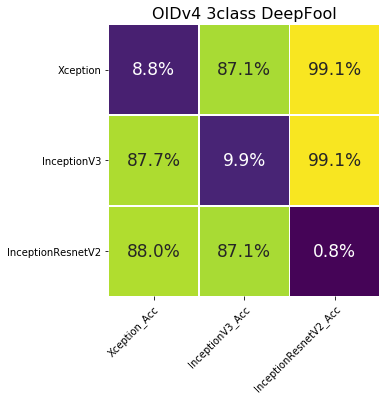

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(oid3class_deepfool_df.iloc[:, -3:], ax=ax, **heatmap_args)
ax.set_title("OIDv4 3class DeepFool", fontsize=16)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
plt.setp(ax.get_yticklabels(), rotation=0)
plt.show()

In [13]:
oid_madry_df = process_df(pd.read_csv('csvs/oid3class_madry_0.00392156862745098.csv', index_col=0), 'oid3class')
oid_madry_df

,L1,L2,L_inf,Xception_Acc,InceptionV3_Acc,InceptionResnetV2_Acc
Xception,9618.053711,20.376554,0.05098,0.070667,0.569333,0.990667
InceptionV3,9944.441406,20.912308,0.05098,0.412000,0.082667,0.992000
InceptionResnetV2,7590.341309,16.860458,0.05098,0.781333,0.777333,0.008000


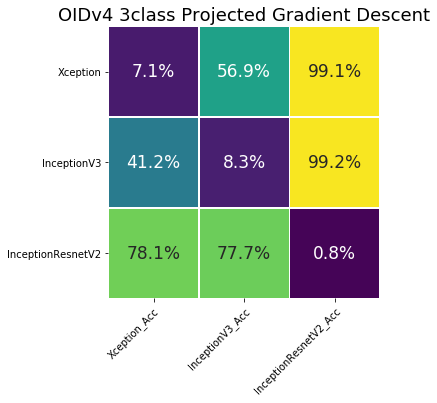

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(oid_madry_df.iloc[:, -3:], ax=ax, **heatmap_args)
ax.set_title("OIDv4 3class Projected Gradient Descent", fontsize=18)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
plt.setp(ax.get_yticklabels(), rotation=0)
plt.show()